In [17]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

Given the function:

\begin{equation}
f(x)=2x^2-2x+3
\end{equation}

Find the global minima of the function.

Analytically:

\begin{align*}
f(x) = 2x^2-2x+3 \\
f'(x) = 4x-2
\end{align*}

setting $f'(x) = 0$

\begin{align*}
f'(x) = 4x-2 \\
0 = 4x-2 \\
2=4x \\
\frac{2}{4}=x \\
x = \frac{1}{2} \\
x = 0.5
\end{align*}

In [18]:
# function (as a function)
def f(x):
  return 2*x**2 - 2*x + 3

# derivative function
def deriv(x):
  return 4*x - 2

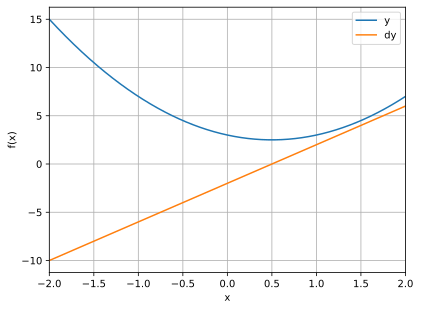

In [19]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,f(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [20]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = 0.004
training_epochs = 100

# Gradient Descent code
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

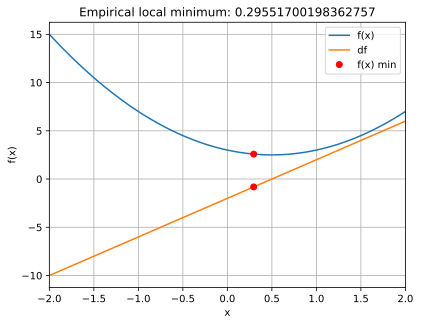

In [21]:
# plot the results

plt.plot(x,f(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,f(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

# Question:

- Why is the result of th gradient descent not equal to the analytical solution?

In [22]:
# learning parameters
learning_rate = 0.018
training_epochs = 100

# random threshold
threshold = np.random.uniform(0.0001, 0.1)
print(f"Random threshold: {threshold:.5f}")

# run through training and store all the results
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,0] = localmin
  modelparams[i,1] = grad

Random threshold: 0.02854


/tmp/ipython-input-3294878968.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparams[i,0] = localmin
/tmp/ipython-input-3294878968.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparams[i,1] = grad


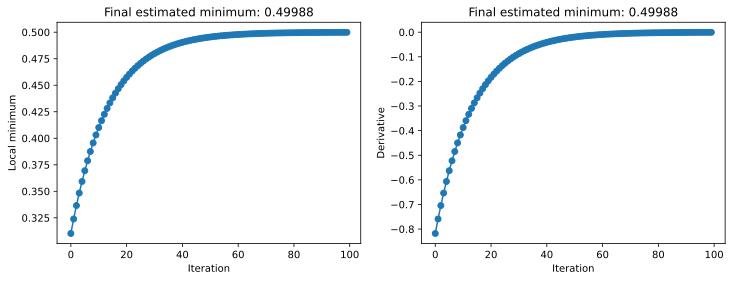

In [23]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

# Exercises

Task:

- Experiment with the values of the learning rate and graph the plot of the local minimum. Describe the result as the value of the learning rate increases.
- Find a random value of the treshold and modify the gradient descent code to include early stopping.